In [67]:
from gwpy.timeseries import TimeSeries
from gwpy.time import tconvert
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
from gwpy.segments import Segment
from gwpy.segments import SegmentList
from gwpy.segments import DataQualityDict
from gwpy.segments import DataQualityFlag
import datetime
from gwpy.time import tconvert
from gwpy.time import from_gps
from gwpy.time import to_gps
import pandas as pd

In [56]:
# Find gps times in filenames
filelist = os.listdir('Feb2020SecTrendDataFiles')
gpslist = []
for file in filelist:
    if file[0:2]=='CS':
        gps = file[10:20]
        gpslist.append(gps)
        
print(gpslist)

['1264550418', '1264636818', '1264723218', '1264809618', '1264896018', '1264982418', '1265068818', '1265155218', '1265241618', '1265328018', '1265414418', '1265500818', '1265587218', '1265673618', '1265760018', '1265846418', '1265932818', '1266019218', '1266105618', '1266192018', '1266278418', '1266364818', '1266451218', '1266537618', '1266624018', '1266710418', '1266796818', '1266883218', '1266969618']


1264550418


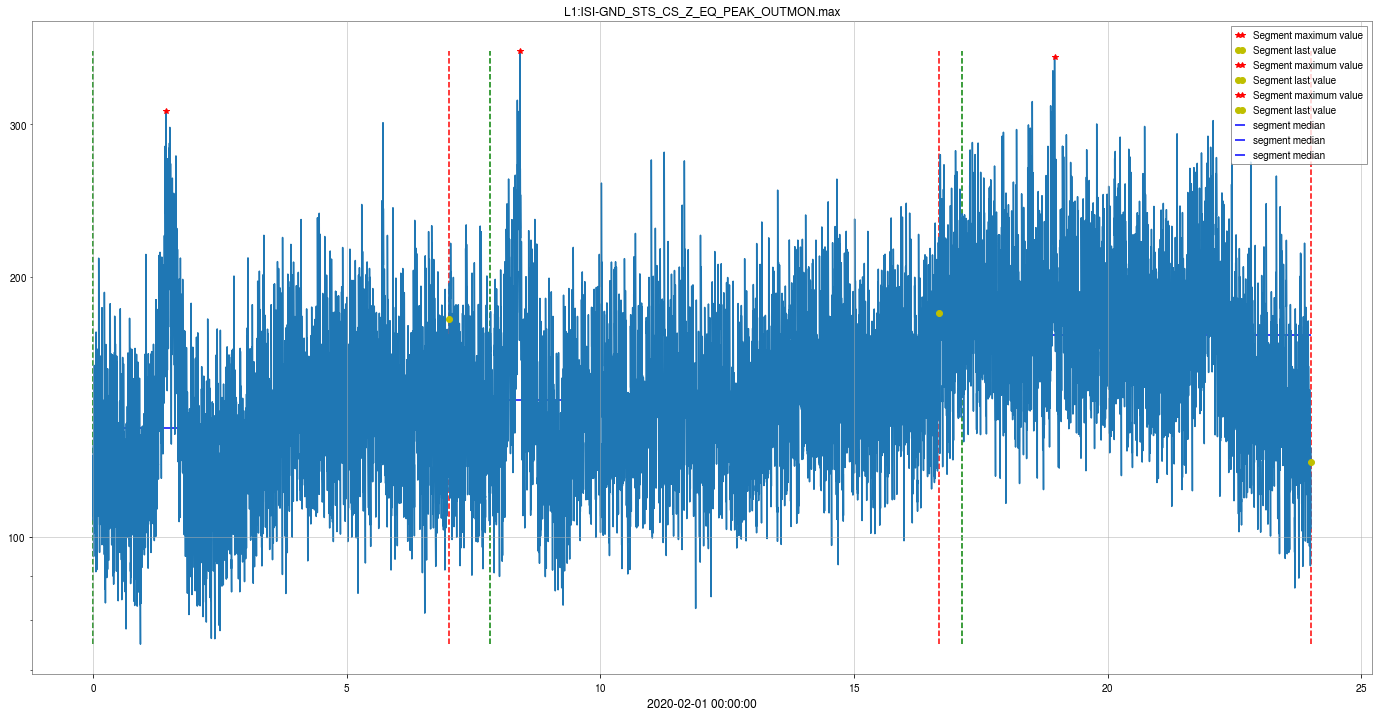

1264636818


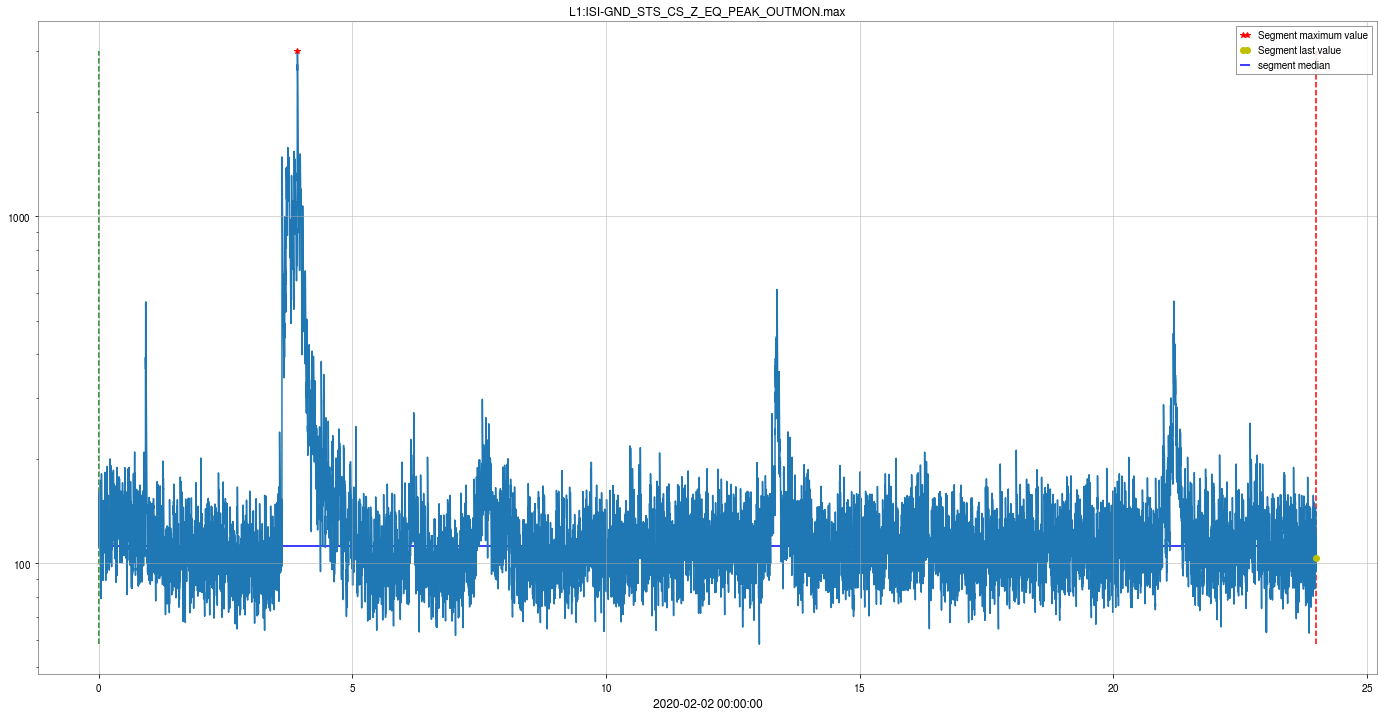

1264723218


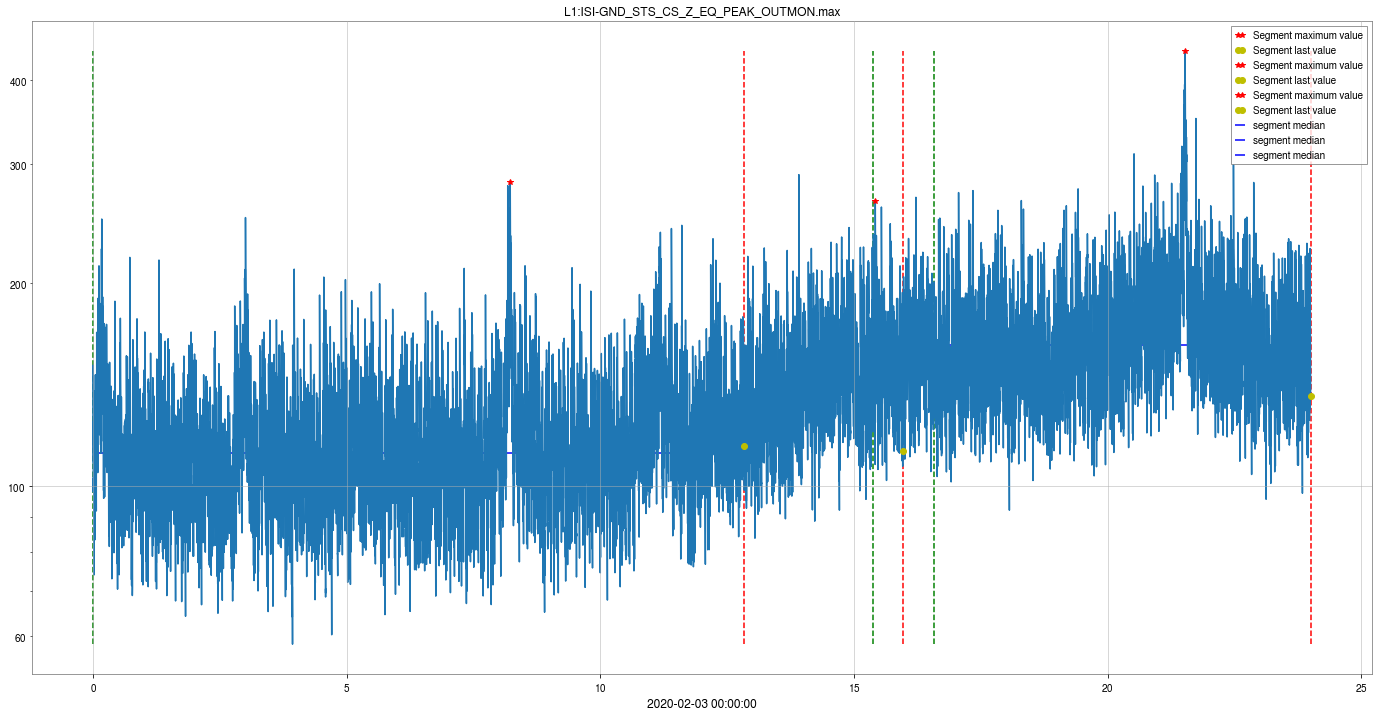

1264809618


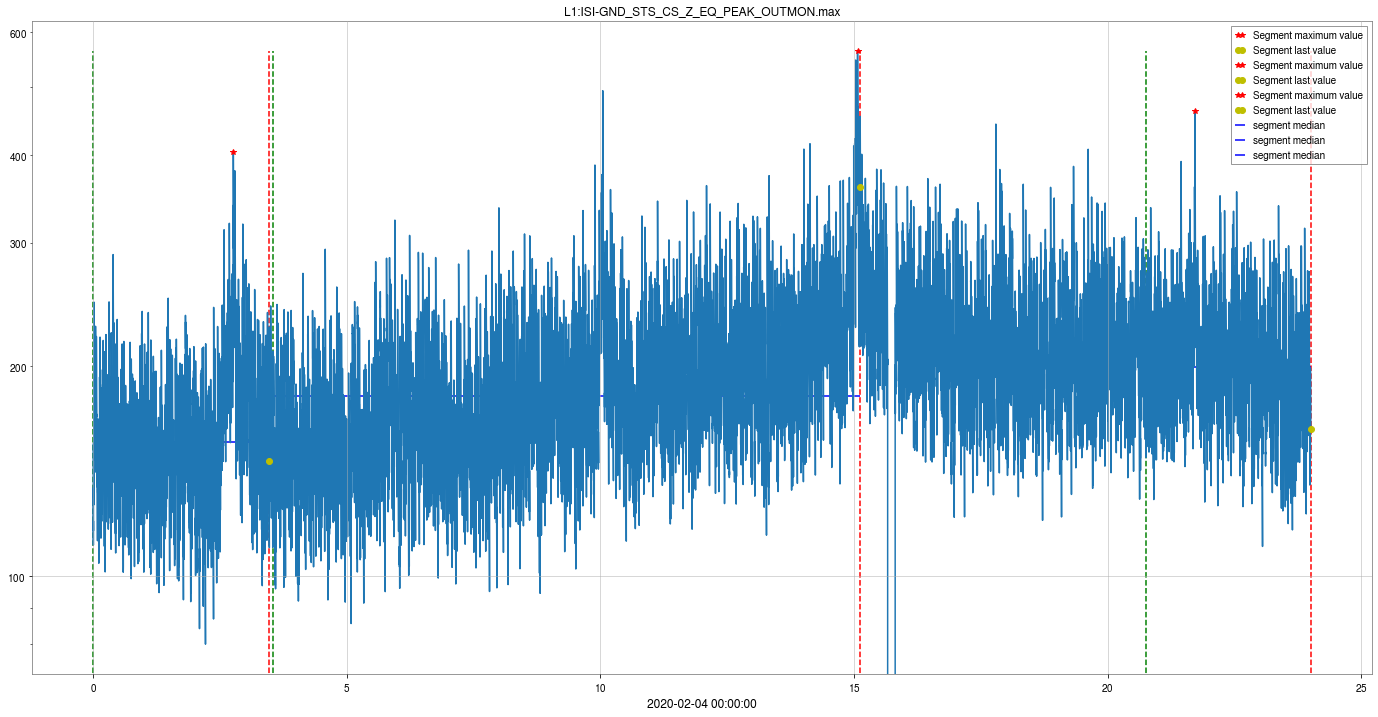

1264896018


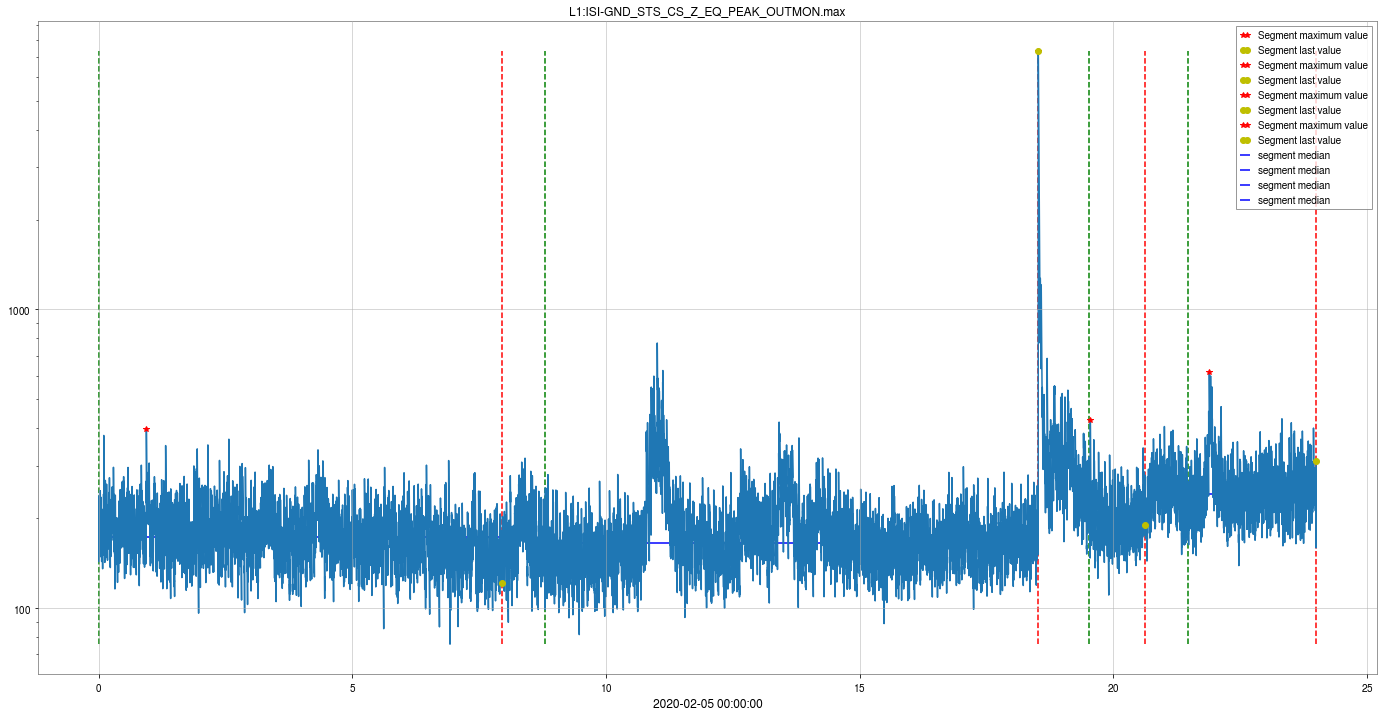

1264982418


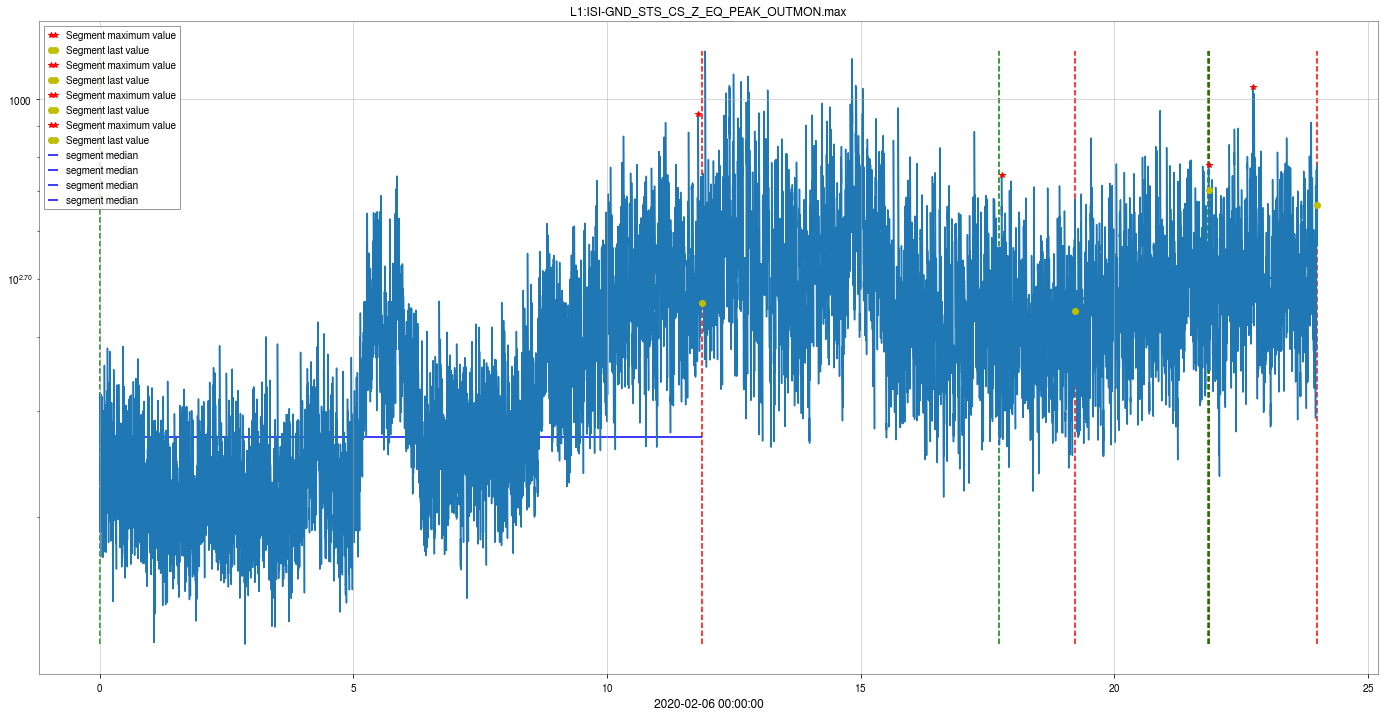

1265068818


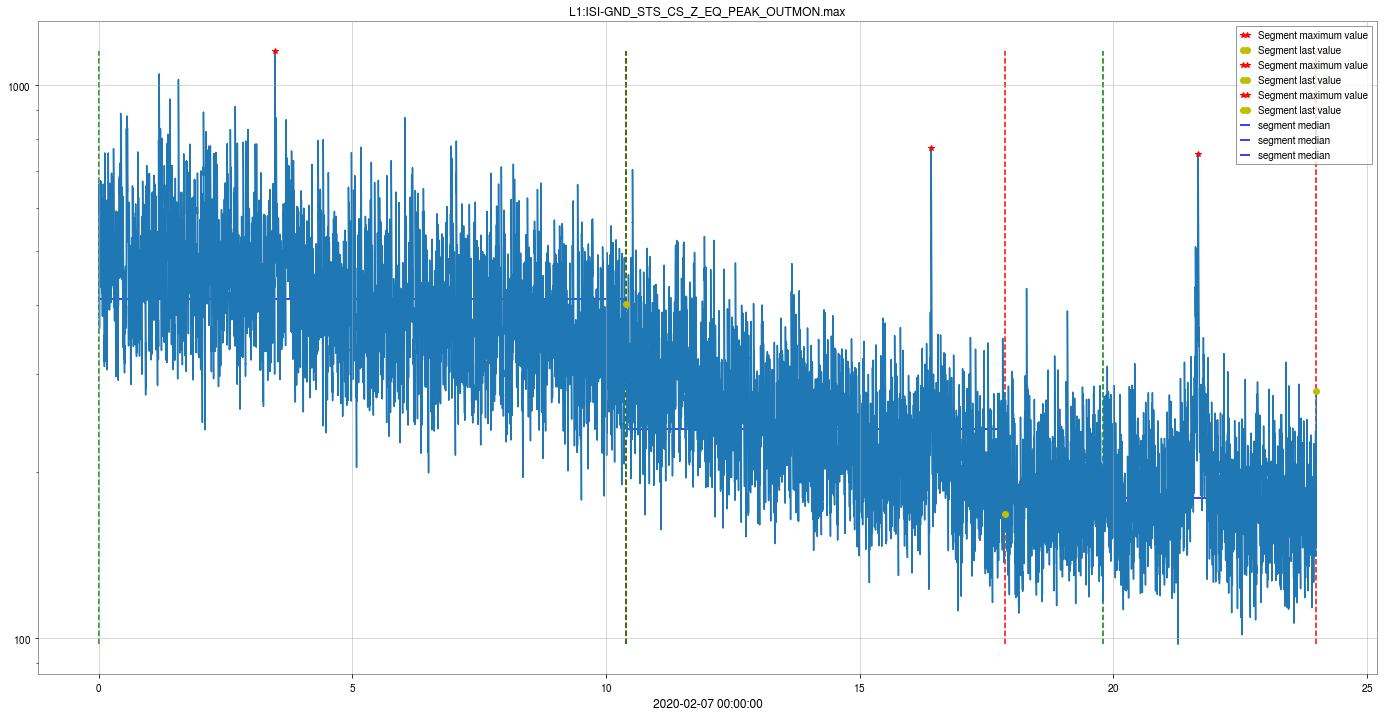

1265155218


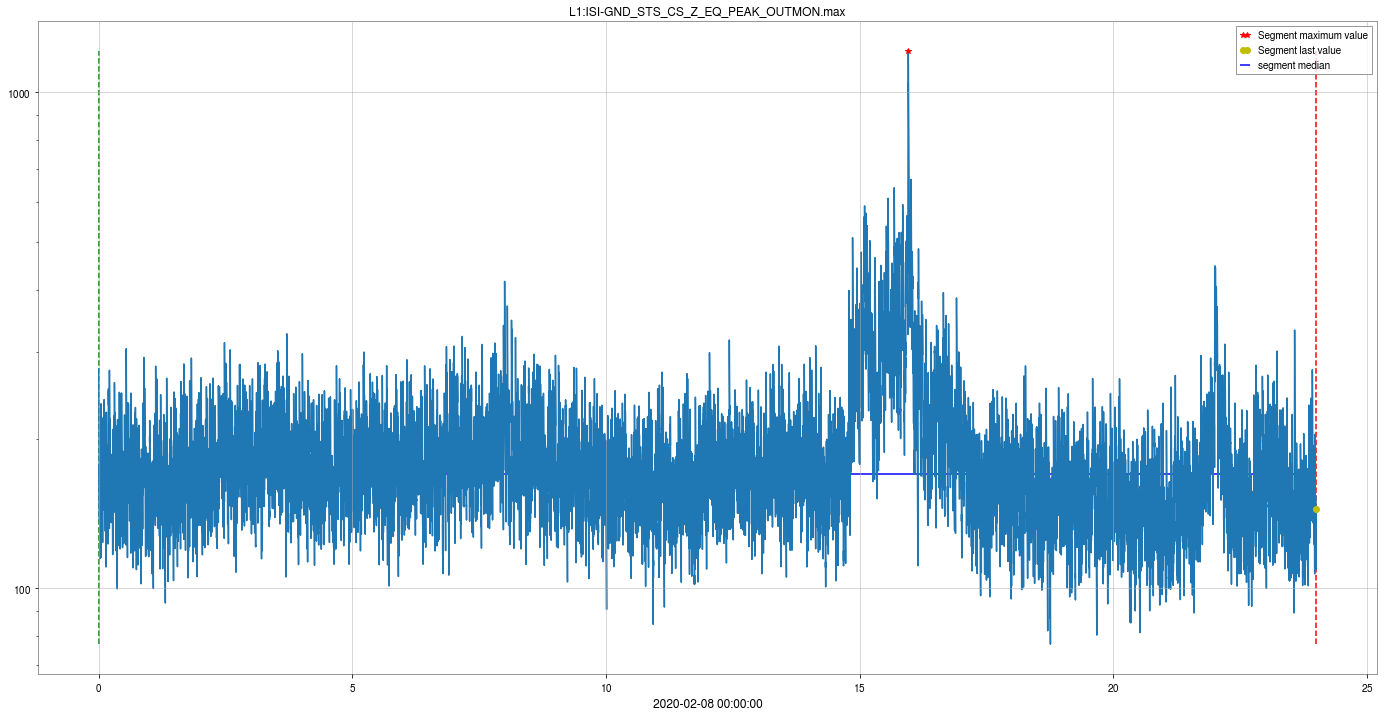

1265241618


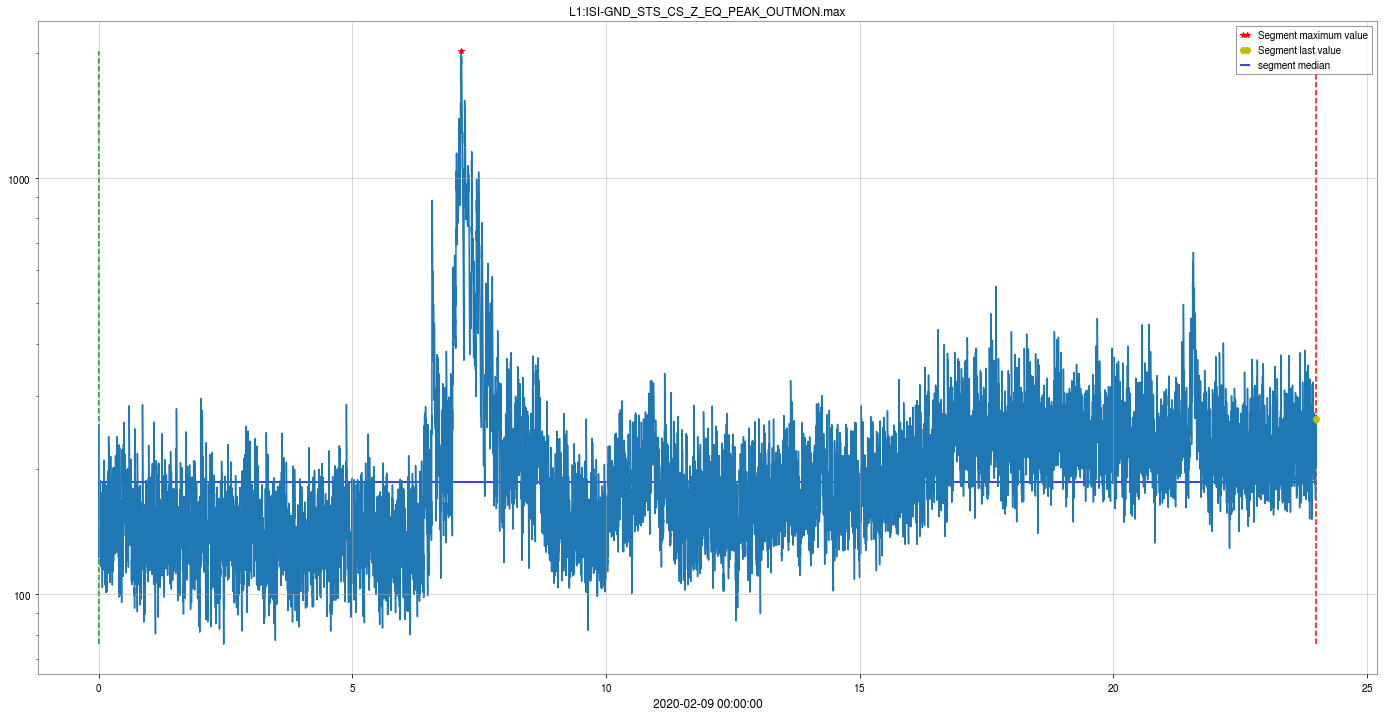

1265328018


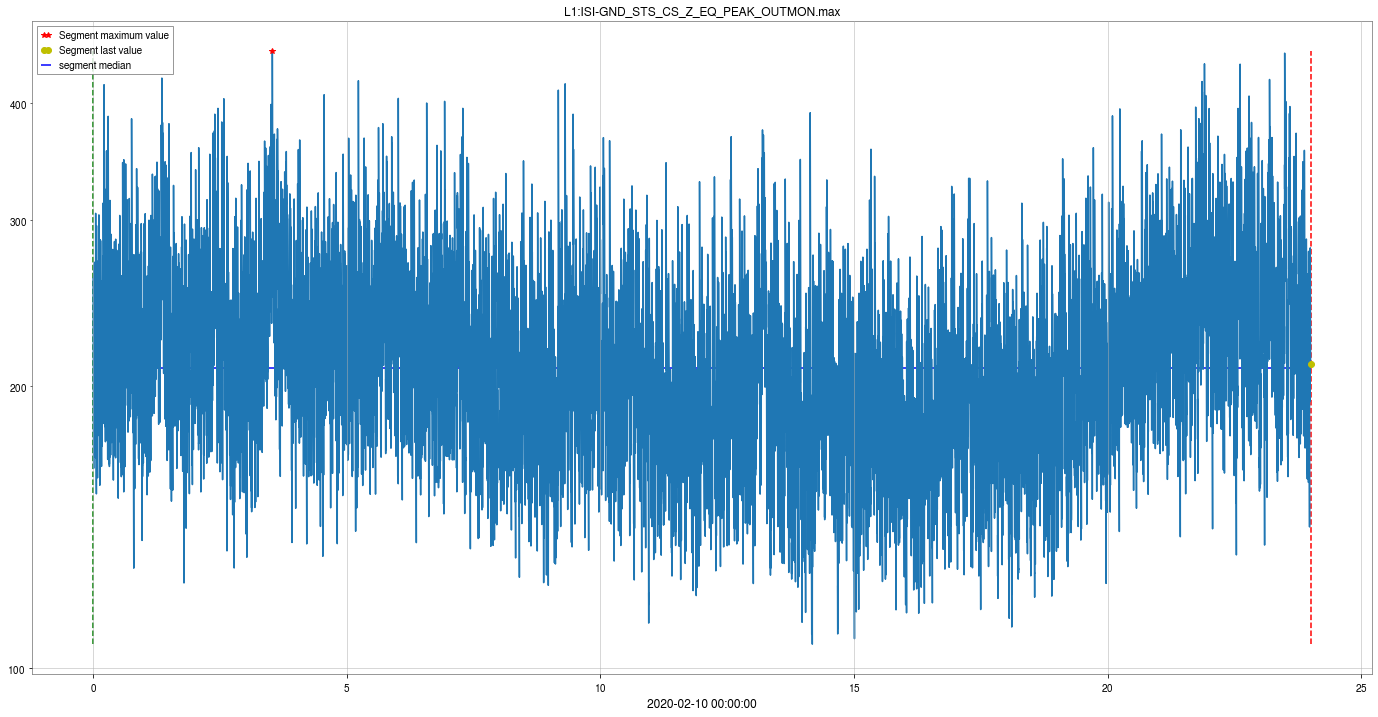

1265414418


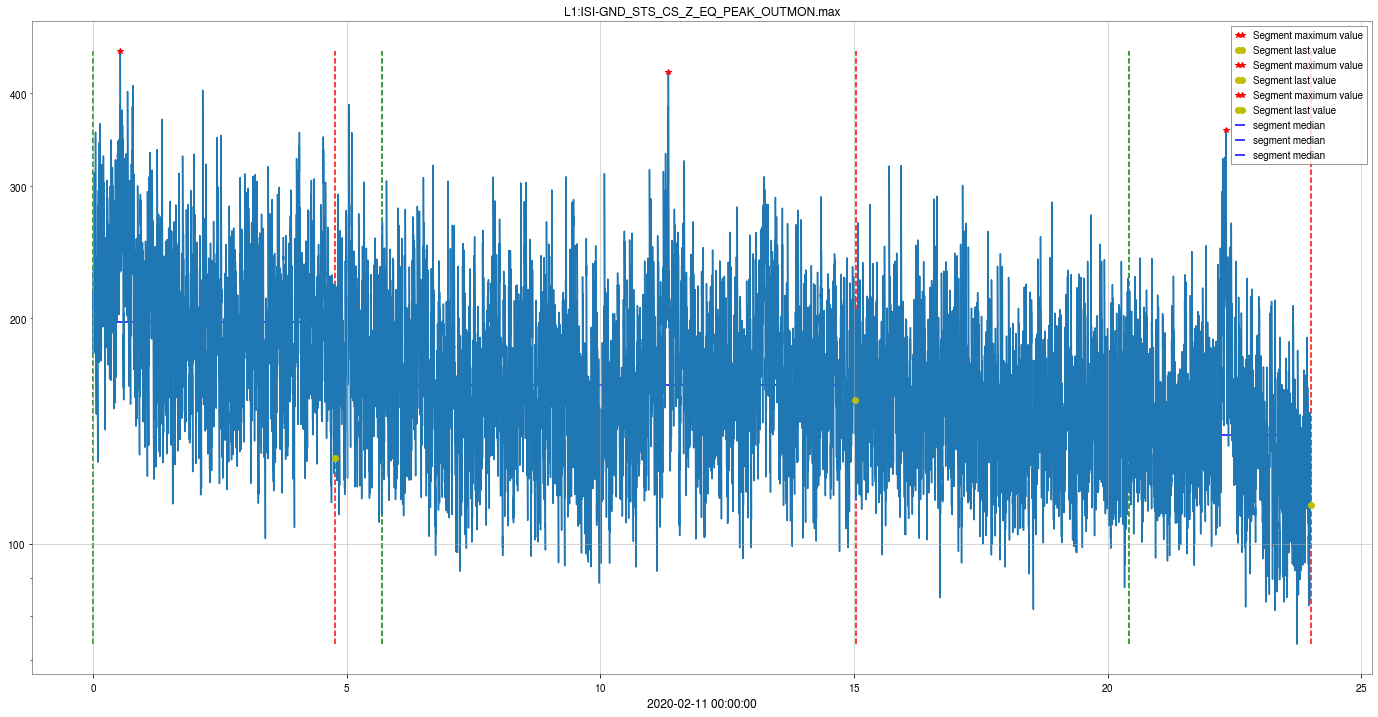

1265500818


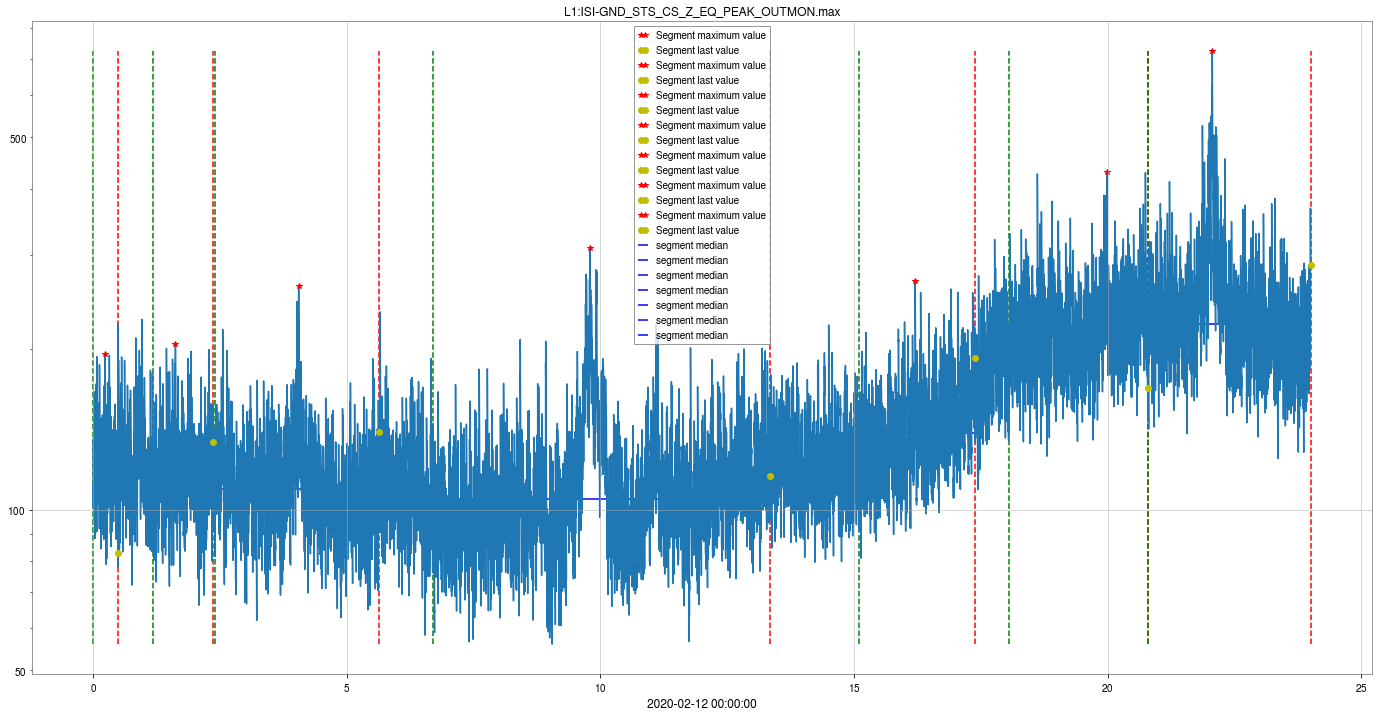

1265587218


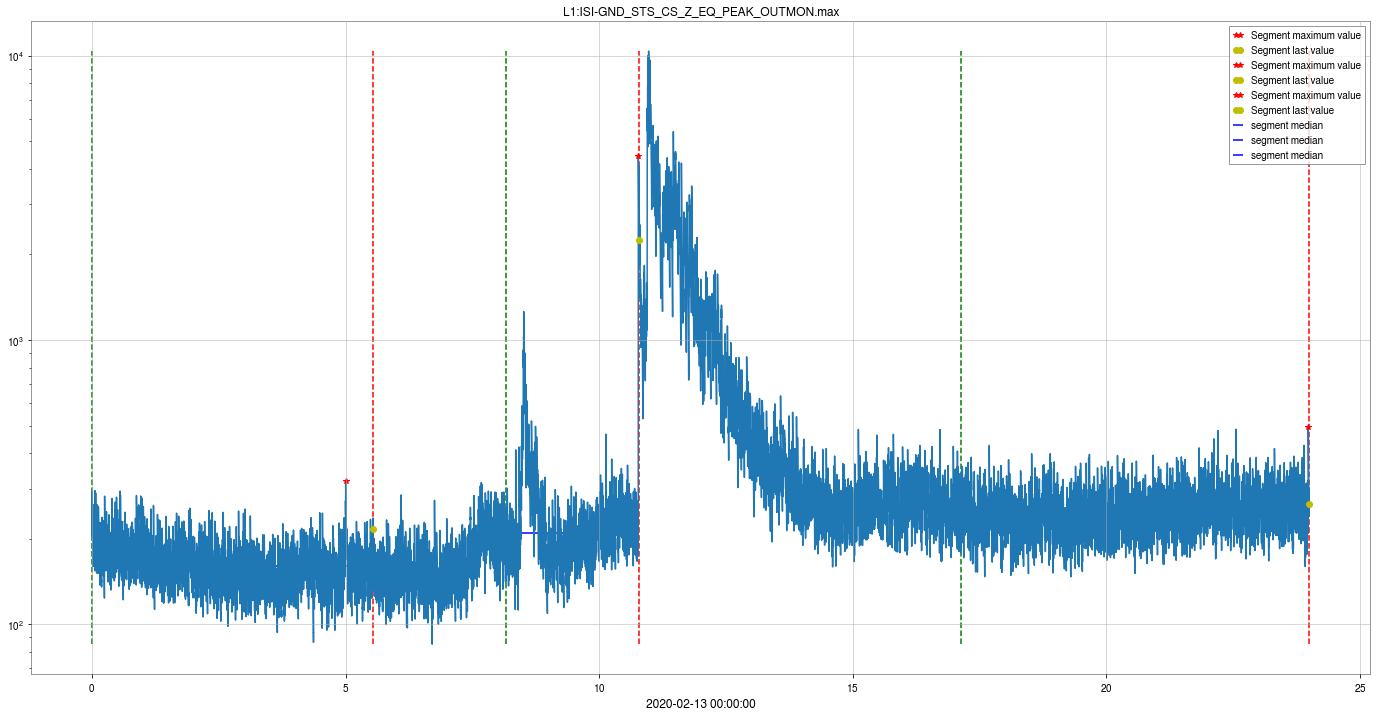

1265673618


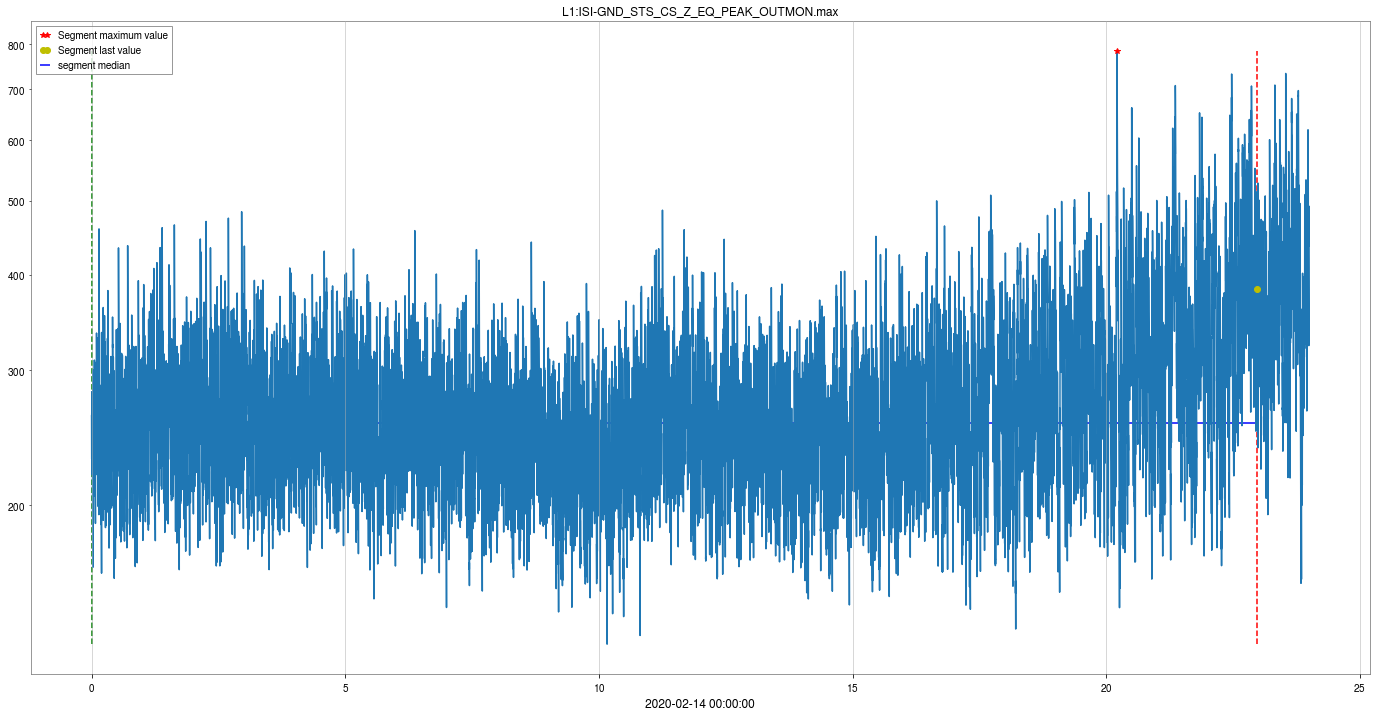

1265760018


No handles with labels found to put in legend.


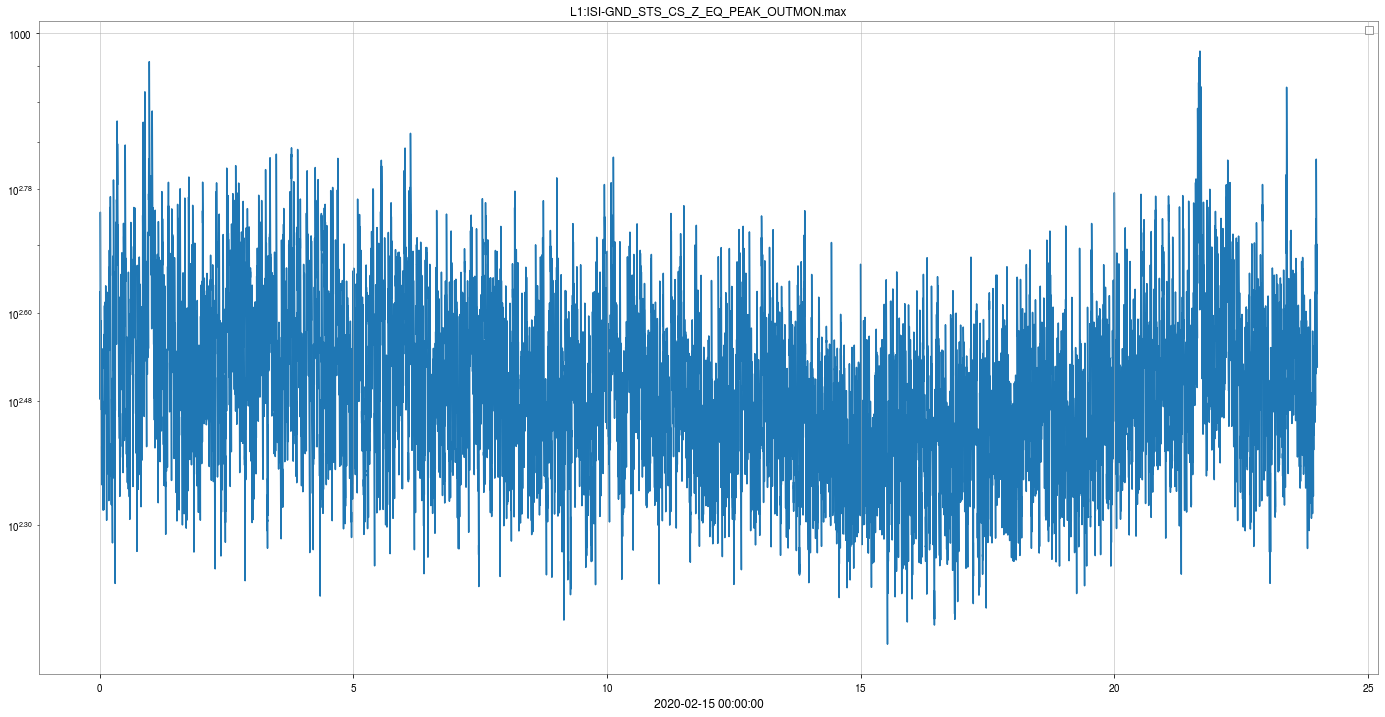

1265846418


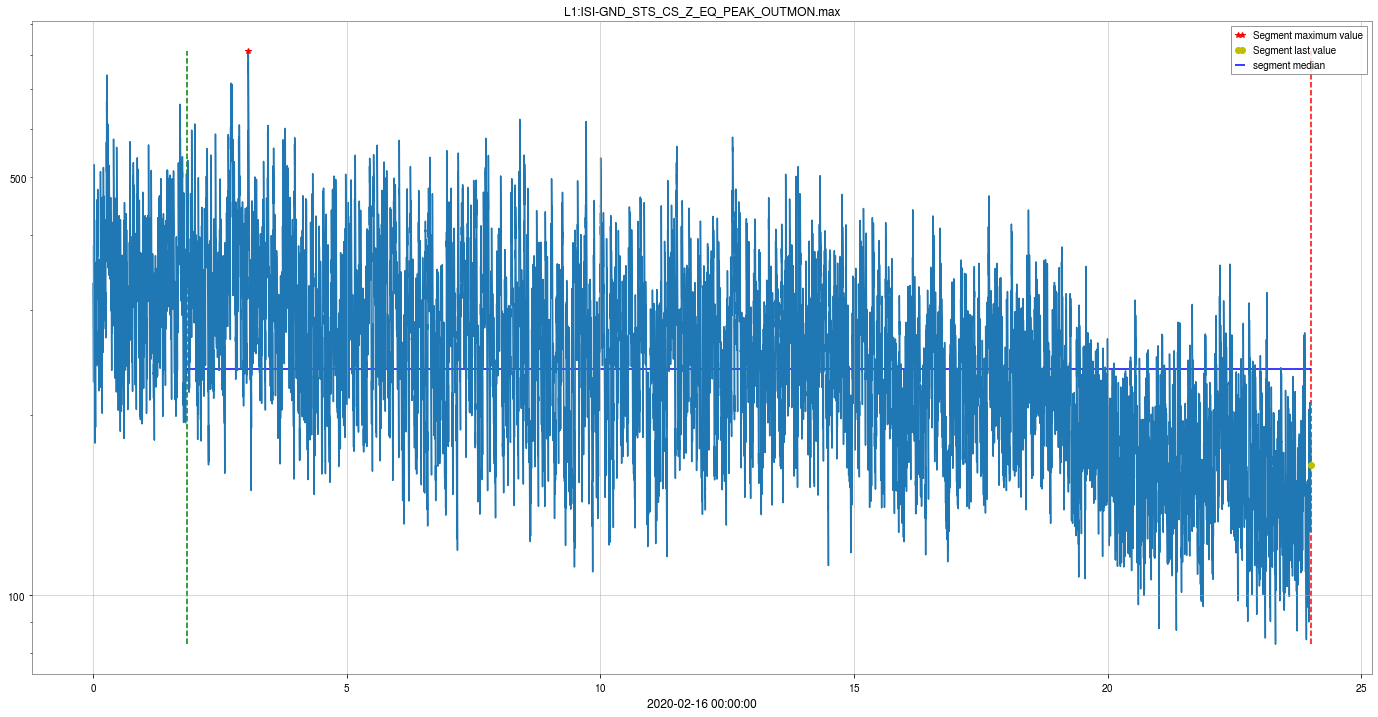

1265932818


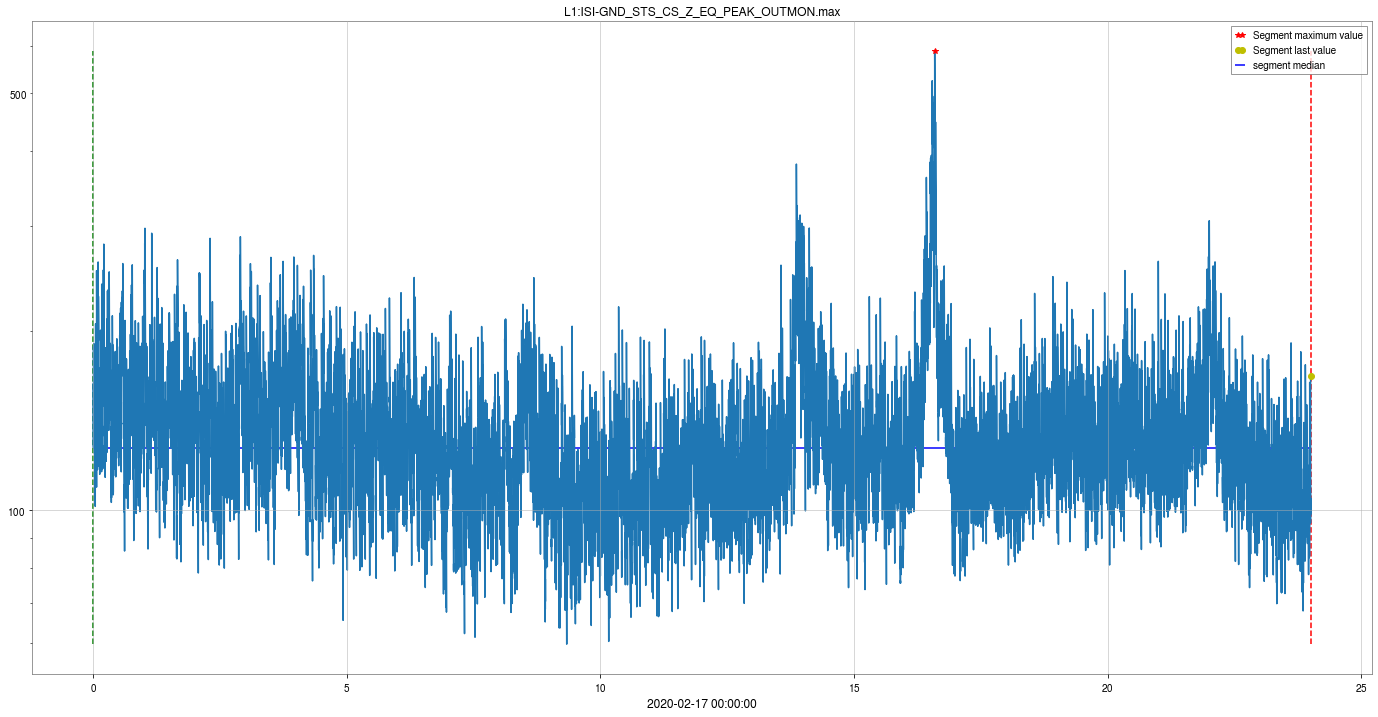

1266019218


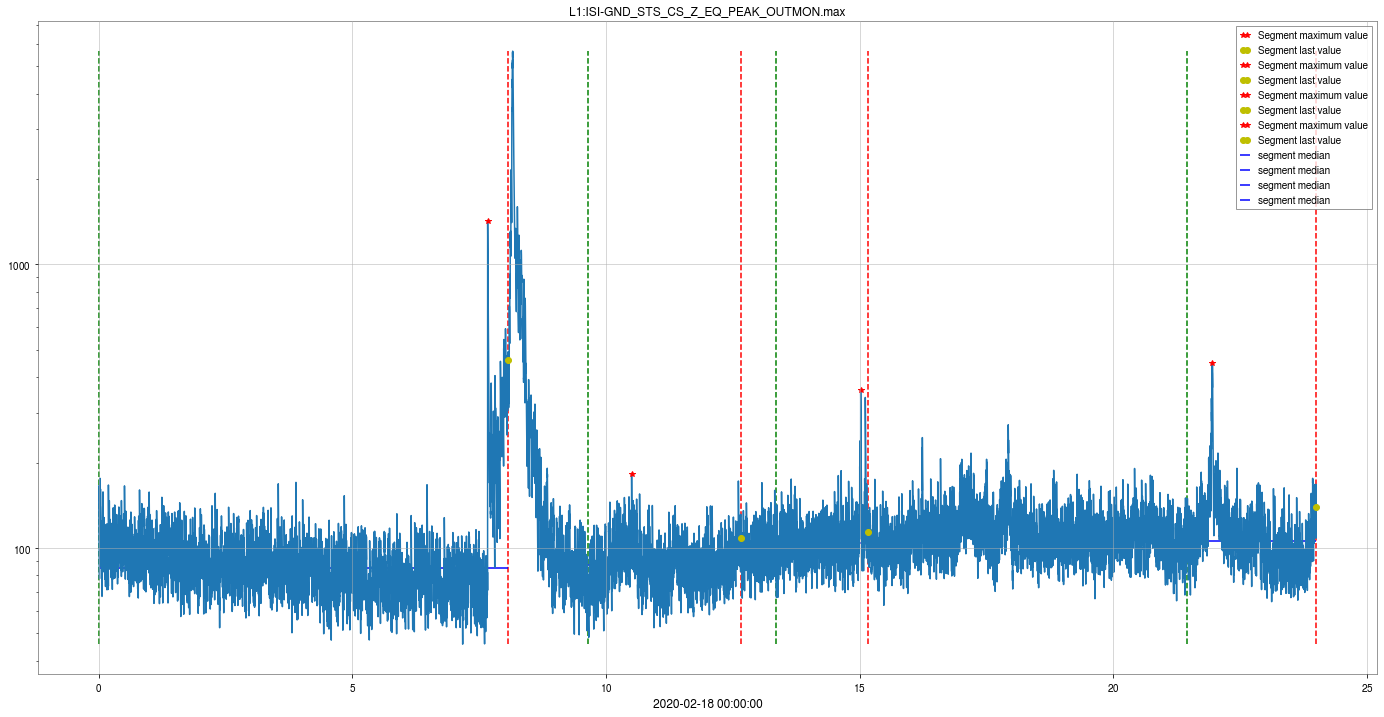

1266105618


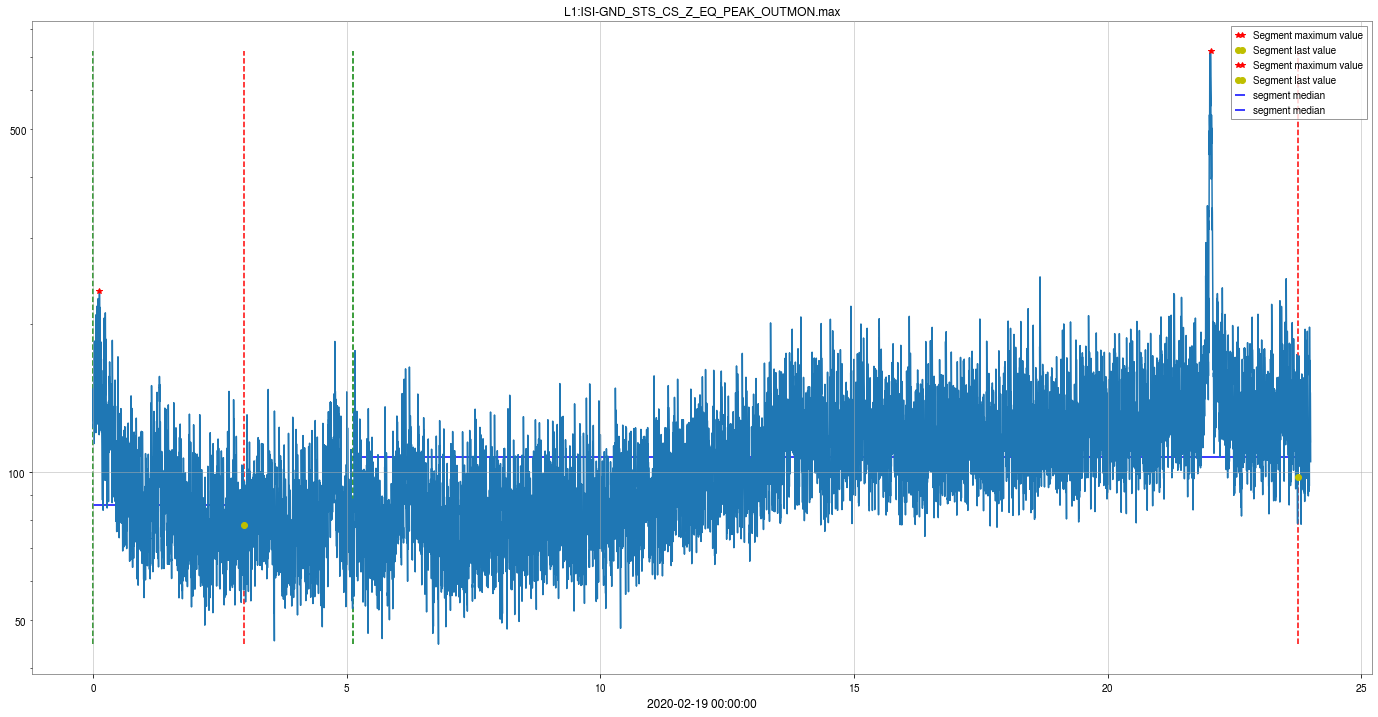

1266192018


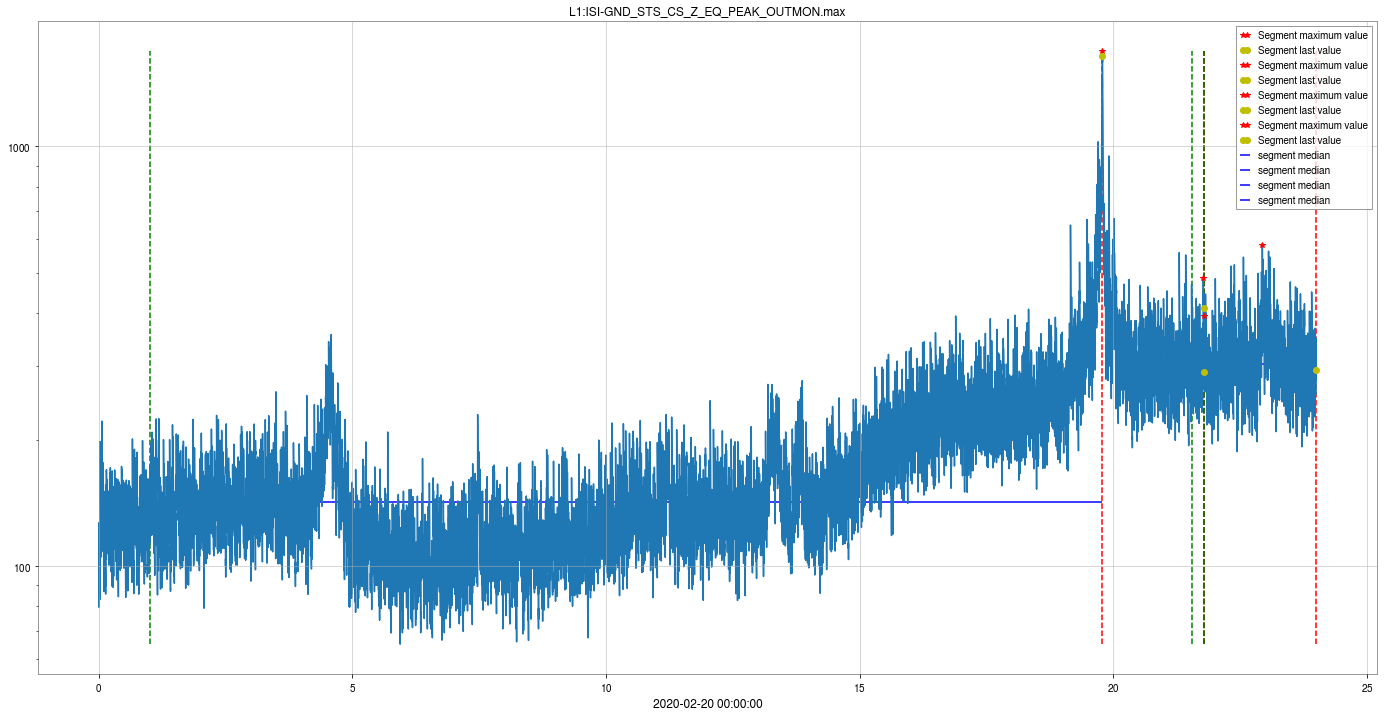

1266278418


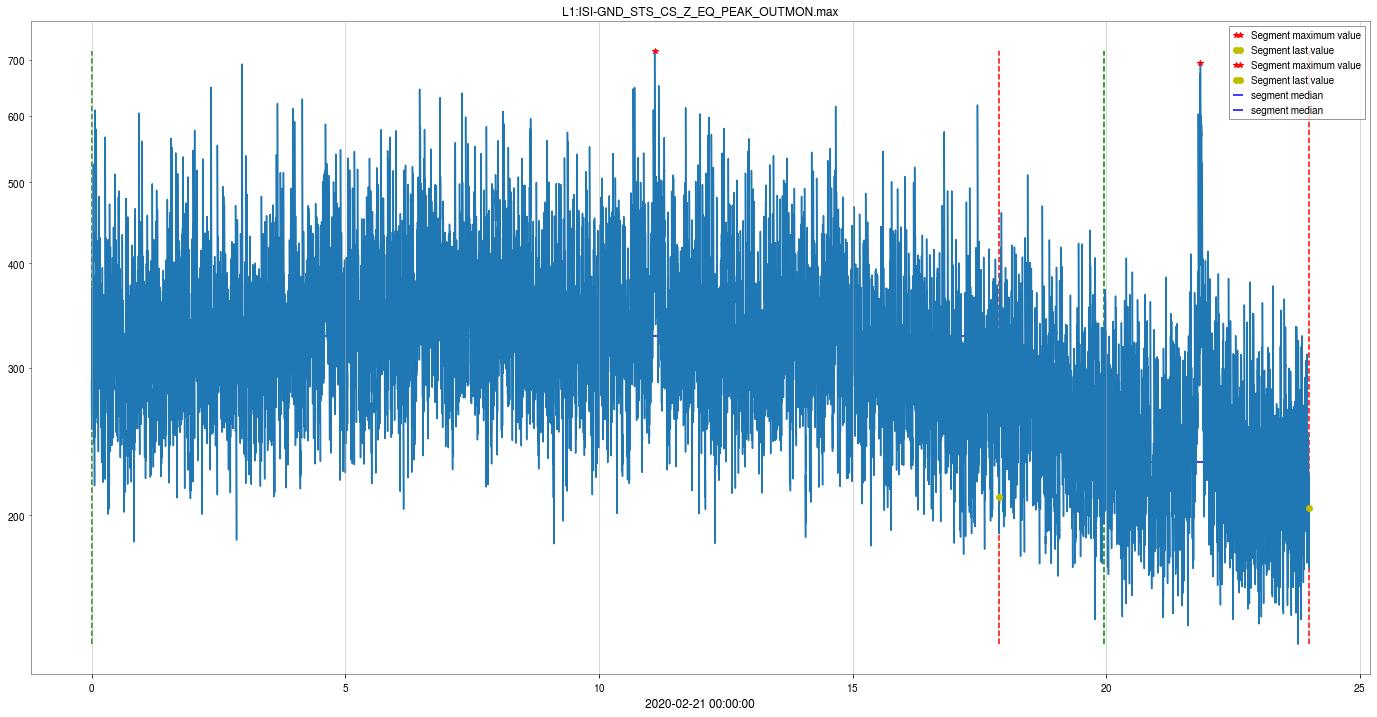

1266364818


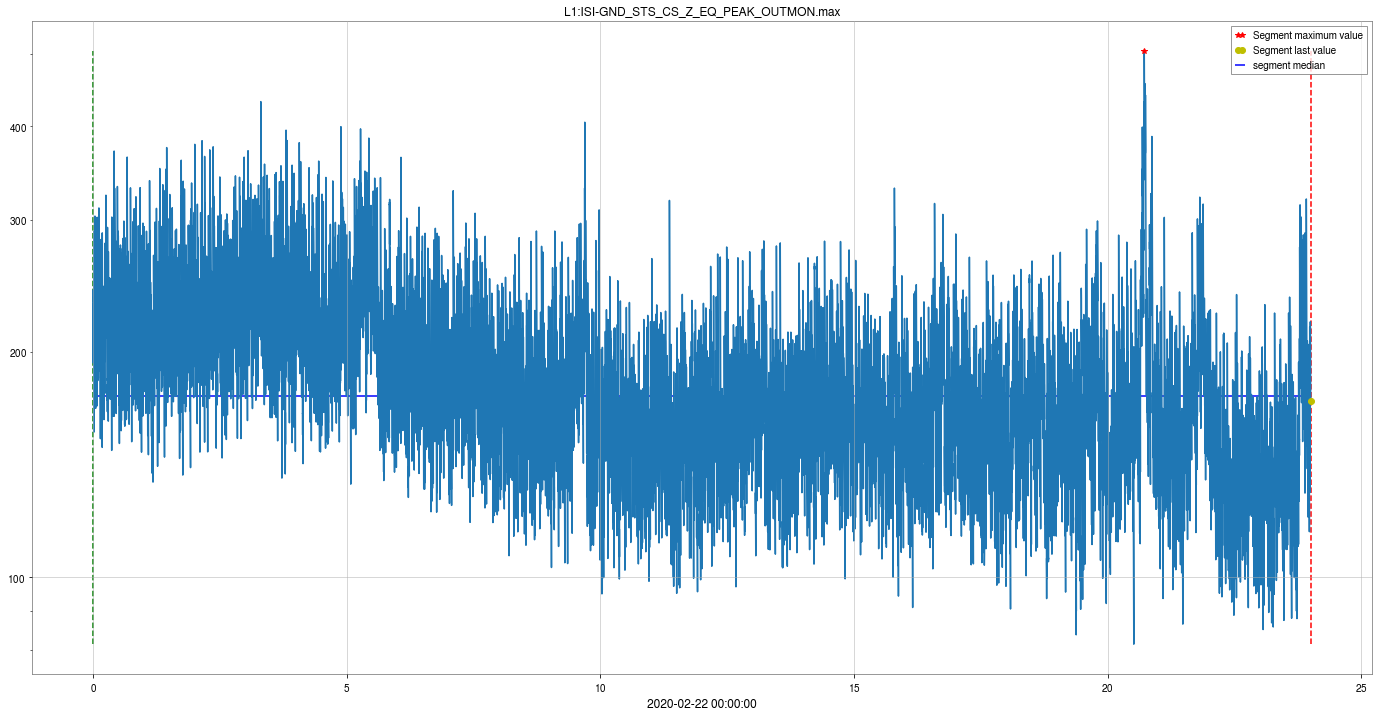

1266451218


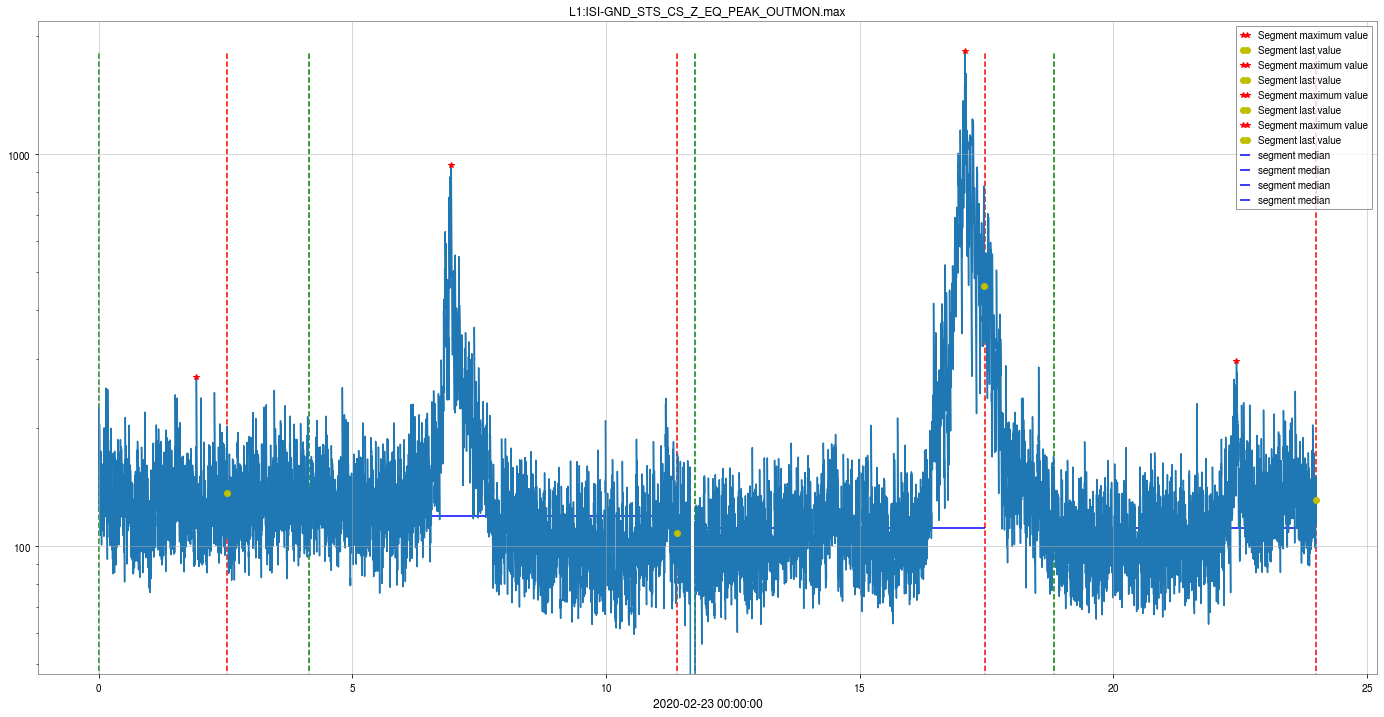

1266537618


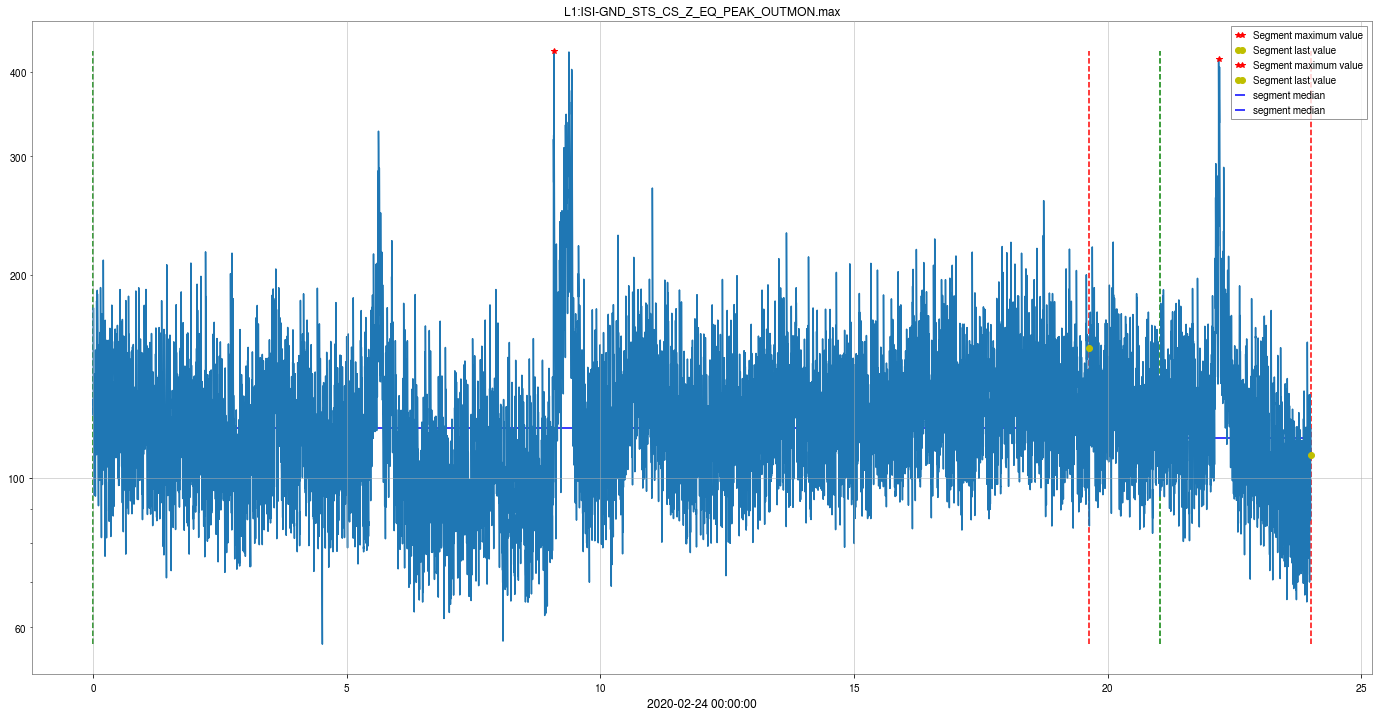

1266624018


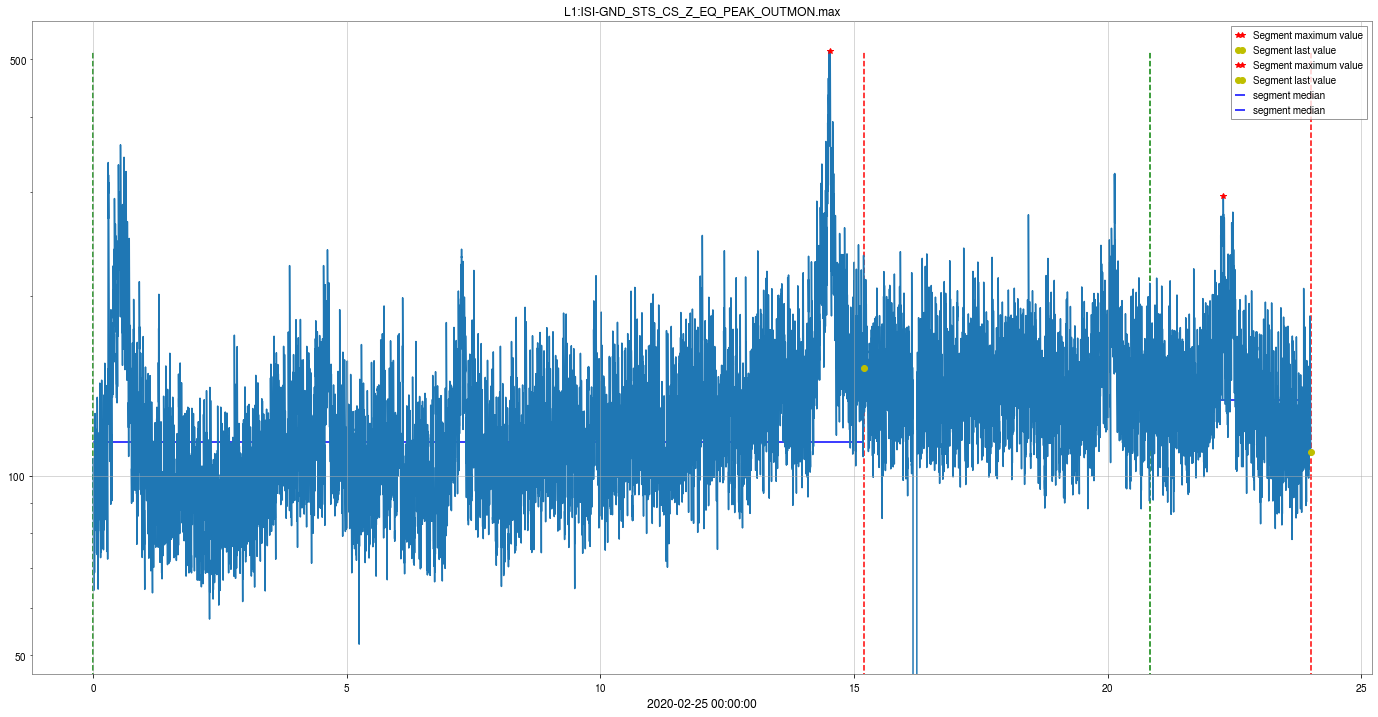

1266710418


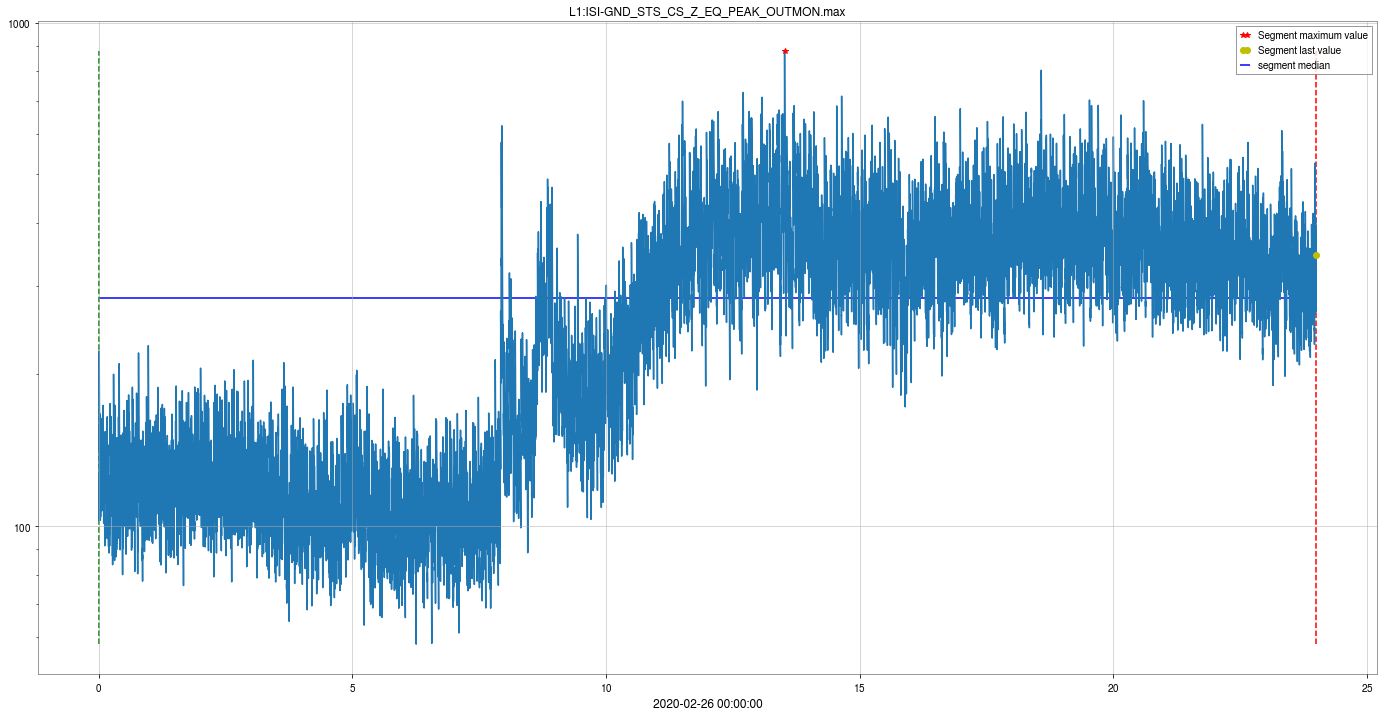

1266796818


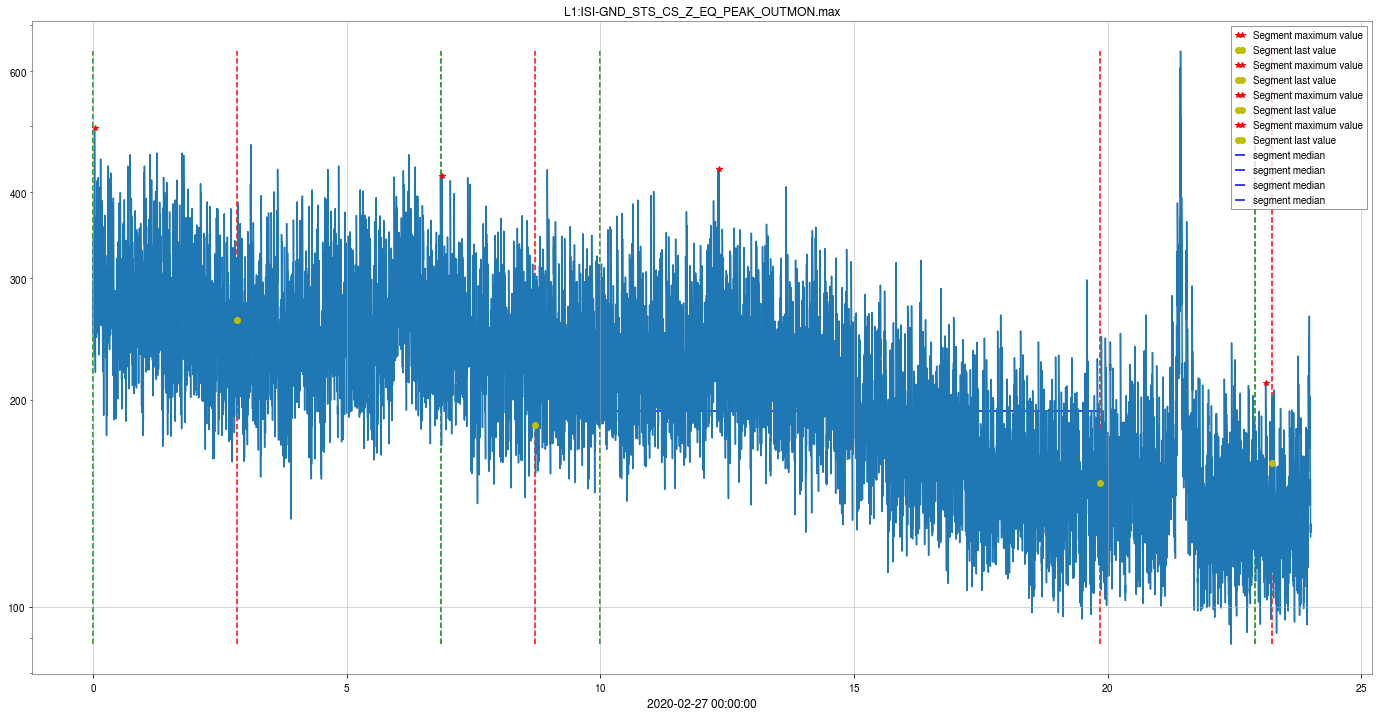

1266883218


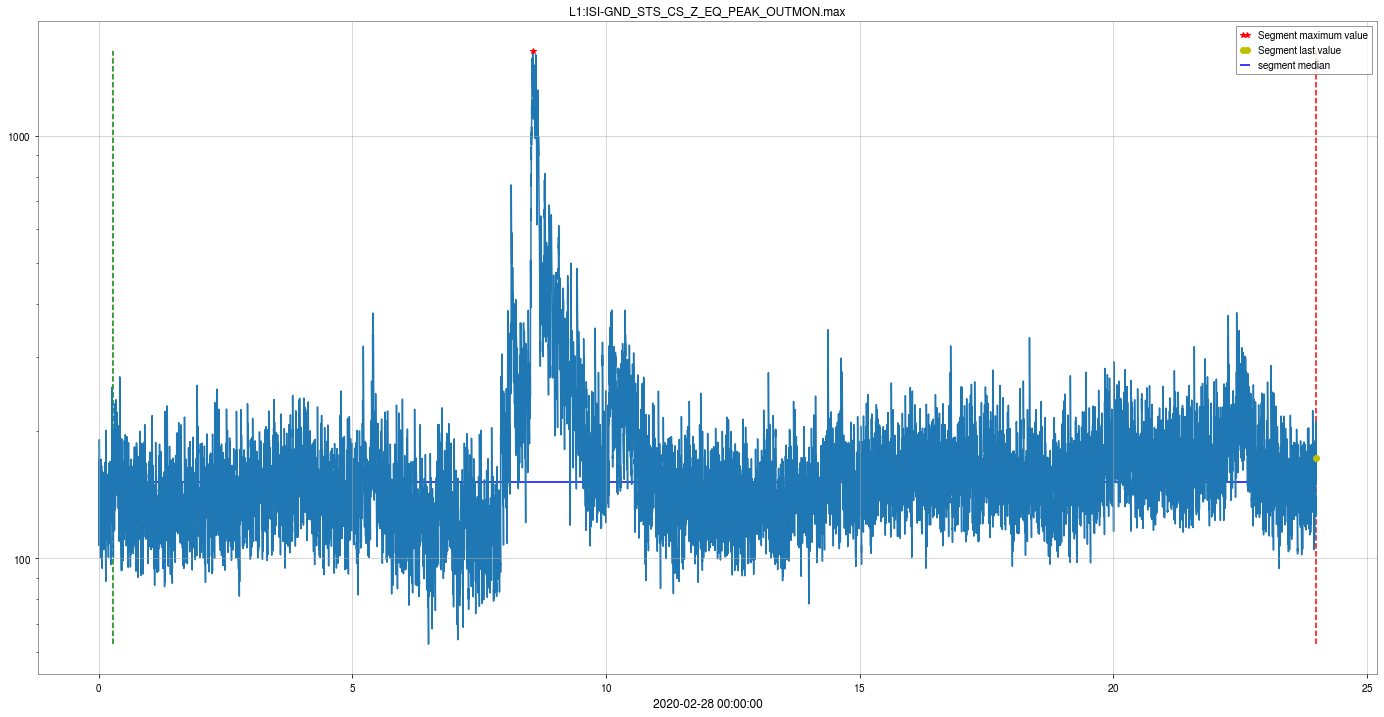

1266969618


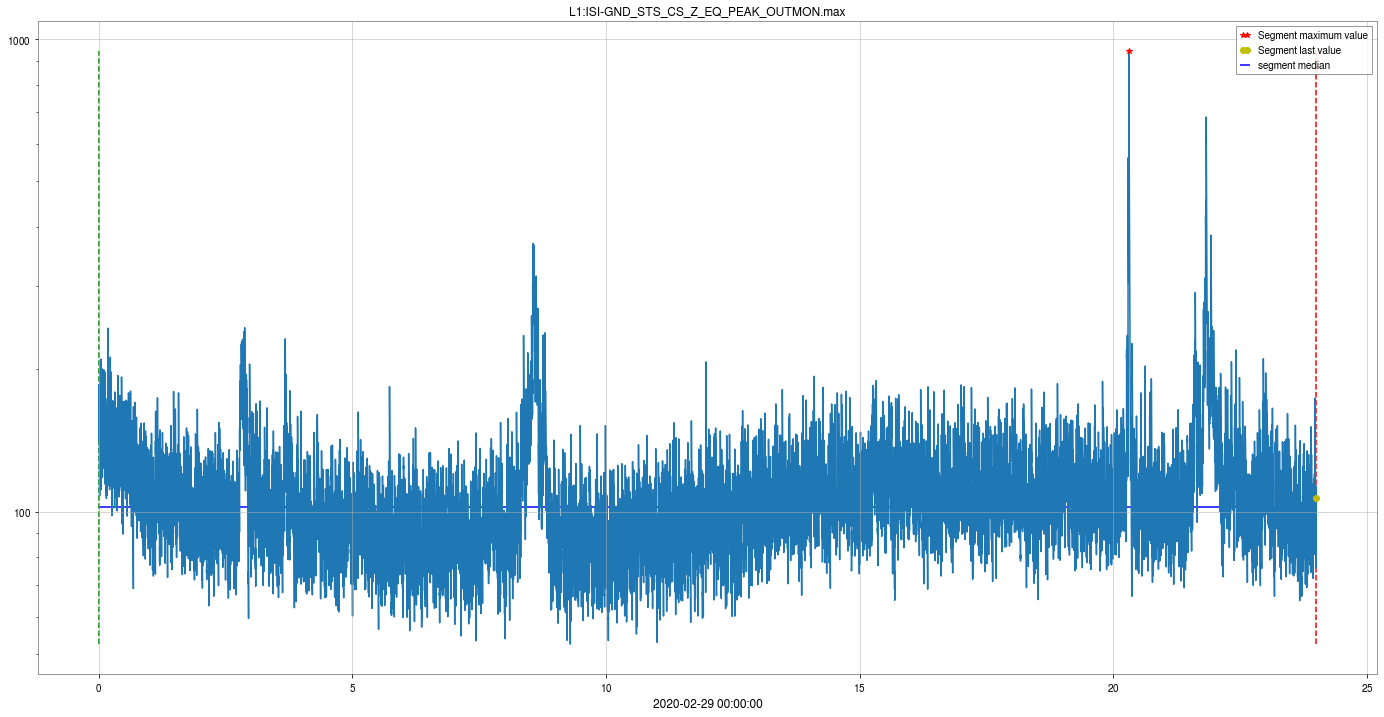

In [59]:
daydata = []

for gps in gpslist:
    
    print(gps)
    fname = '/home/gabriela.gonzalez/EarthquakeInvestigation/Feb2020SecTrendDataFiles/CSZEQPEAK_' + gps + '.hdf'
    data = TimeSeries.read(fname)
    gpss = int(gps)
    gpse = gpss+24*3600
    seglist = DataQualityFlag.query('L1:DMT-GRD_ISC_LOCK_NOMINAL:1',gpss, gpse).active
    daydata = []
    
    t0 = data.t0.value
    t = data.times.value - t0 #time since initial day time
    z = data.value


    plt.figure(figsize=(24,12))
    
    plot = plt.plot(t/3600,z)
    plt.title(data.name)
    plt.yscale('log')
    plt.xlabel(from_gps(data.t0.value))
    
    for i in range(len(seglist)):
        ixs = np.int(np.floor((np.float(seglist[i].start) - np.float(to_gps(data.t0)))))
        ixe = np.int(np.ceil((np.float(seglist[i].end) - np.float(to_gps(data.t0)))))
        ts = np.float(seglist[i].start)
        te = np.float(seglist[i].end)
        maxv = np.max(data.value[ixs:ixe-1])
        imax = np.where(data.value == maxv)
        tmax = np.float(data.times.value[imax])
        medv = np.median(data.value[ixs:ixe-1])
        lastv = data.value[ixe-1]
        daydata.append([ts, te, tmax, maxv, medv, lastv])
        


        plt.vlines((daydata[i][0]-t0)/3600, min(z), max(z), color='green', linestyle = '--')
        plt.vlines((daydata[i][1]-t0)/3600, min(z), max(z), color='red', linestyle = '--')
        plt.hlines(daydata[i][3], np.float(to_gps(seglist[i].start-t0))/3600, np.float(to_gps(seglist[i].end-t0))/3600, 
               color = 'blue', label = 'segment median')
        imax = np.where(z == daydata[i][2])
        plt.plot(np.float(t[imax]/3600),np.float(z[imax]),'r*', label = 'Segment maximum value')
        ilast = np.where(z == daydata[i][4])
        
        plt.plot(np.float(t[ilast]/3600),np.float(z[ilast]),'yo', label = 'Segment last value')

    plt.legend()
    
    figname = 'Feb2020SecTrendFigFiles/DayCSZSegs_' + gps + '.png'
    plt.savefig(figname)
    

    plt.show()



In [75]:
#Don't plot, just calculate data and save it

daydata = []

for gps in gpslist:
    
    fname = 'Feb2020SecTrendDataFiles/CSZEQPEAK_' + gps + '.hdf'
    data = TimeSeries.read(fname)
    gpss = int(gps)
    gpse = gpss+24*3600
    seglist = DataQualityFlag.query('L1:DMT-GRD_ISC_LOCK_NOMINAL:1',gpss, gpse).active
  
    for i in range(len(seglist)):
        ixs = np.int(np.floor((np.float(seglist[i].start) - np.float(to_gps(data.t0)))))
        ixe = np.int(np.ceil((np.float(seglist[i].end) - np.float(to_gps(data.t0)))))
        ts = np.float(seglist[i].start)
        te = np.float(seglist[i].end)
        maxv = np.max(data.value[ixs:ixe-1])
        tmaxv = np.float(data.times.value[np.where(data.value == maxv)])
        medv = np.median(data.value[ixs:ixe-1])
        lastv = data.value[ixe-1]
        daydata.append([ts, te, tmaxv, maxv, medv, lastv])

dfFebSecDayData = pd.DataFrame(daydata,
                               columns = ['Segment Start Time', 'Segment End Time', 'Time Max Velocity', 
                                          'Max Velocity', 'Median Velocity', 'Last Velocity'])
dfFebSecDayData.to_pickle('FebSecDayData.pkl')

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [73]:
pd = pd.read_pickle('FebSecDayData.pkl')

pd

In [74]:
pd

Segment Start Time  Segment End Time Time Max Velocity  Max Velocity  \
0         1.264550e+09      1.264576e+09    [1264555589.0]    311.368683   
1         1.264579e+09      1.264610e+09    [1264580695.0]    364.818329   
2         1.264612e+09      1.264637e+09    [1264618645.0]    359.448883   
3         1.264637e+09      1.264723e+09    [1264650919.0]   2997.984863   
4         1.264723e+09      1.264769e+09    [1264752814.0]    282.059692   
5         1.264779e+09      1.264781e+09    [1264778721.0]    264.498322   
6         1.264783e+09      1.264810e+09    [1264800700.0]    441.627472   
7         1.264810e+09      1.264822e+09    [1264819563.0]    403.763947   
8         1.264822e+09      1.264864e+09    [1264863863.0]    563.525513   
9         1.264884e+09      1.264896e+09    [1264887808.0]    462.173645   
10        1.264896e+09      1.264925e+09    [1264899398.0]    398.887604   
11        1.264928e+09      1.264963e+09    [1264962694.0]   7329.563965   
12        1.264966e+09      1.264970e+09    [1264966387.0]    427.924957   
13        1.264973e+09      1.264982e+09    [1264974833.0]    616.507080   
14        1.264982e+09      1.265025e+09    [1265024892.0]    944.338013   
15        1.265046e+09      1.265052e+09    [1265046422.0]    745.850281   
16        1.265061e+09      1.265061e+09    [1265061112.0]    774.504272   
17        1.265061e+09      1.265069e+09    [1265064267.0]   1047.525757   
18        1.265069e+09      1.265106e+09    [1265081330.0]   1151.601807   
19        1.265106e+09      1.265133e+09    [1265127892.0]    769.004883   
20        1.265140e+09      1.265155e+09    [1265146837.0]    751.664001   
21        1.265155e+09      1.265242e+09    [1265212668.0]   1210.862183   
22        1.265242e+09      1.265328e+09    [1265267348.0]   2019.355957   
23        1.265328e+09      1.265414e+09    [1265340732.0]    454.404785   
24        1.265414e+09      1.265432e+09    [1265416340.0]    454.740082   
25        1.265435e+09      1.265469e+09    [1265455236.0]    426.401001   
26        1.265488e+09      1.265501e+09    [1265494809.0]    357.300385   
27        1.265501e+09      1.265503e+09    [1265501649.0]    195.970627   
28        1.265505e+09      1.265509e+09    [1265506654.0]    204.740128   
29        1.265509e+09      1.265521e+09    [1265515399.0]    262.399933   
..                 ...               ...               ...           ...   
38        1.265853e+09      1.265933e+09    [1265857422.0]    810.805908   
39        1.265933e+09      1.266019e+09    [1265992537.0]    588.465393   
40        1.266019e+09      1.266048e+09    [1266046817.0]   1419.518799   
41        1.266054e+09      1.266065e+09    [1266057033.0]    181.726089   
42        1.266067e+09      1.266074e+09    [1266073290.0]    361.381866   
43        1.266096e+09      1.266106e+09    [1266098253.0]    449.174835   
44        1.266106e+09      1.266116e+09    [1266106062.0]    234.196609   
45        1.266124e+09      1.266191e+09    [1266184911.0]    720.208618   
46        1.266196e+09      1.266263e+09    [1266263240.0]   1687.458740   
47        1.266270e+09      1.266270e+09    [1266270403.0]    484.509308   
48        1.266270e+09      1.266270e+09    [1266270426.0]    394.801575   
49        1.266270e+09      1.266278e+09    [1266274595.0]    581.306213   
50        1.266278e+09      1.266343e+09    [1266318377.0]    716.472839   
51        1.266350e+09      1.266365e+09    [1266357110.0]    692.875122   
52        1.266365e+09      1.266451e+09    [1266439410.0]    503.707825   
53        1.266451e+09      1.266460e+09    [1266458146.0]    269.824066   
54        1.266466e+09      1.266492e+09    [1266476224.0]    937.260559   
55        1.266493e+09      1.266514e+09    [1266512685.0]   1833.391968   
56        1.266519e+09      1.266538e+09    [1266531961.0]    297.362488   
57        1.266538e+09      1.266608e+09    [1266570312.0]    428.860382   
58        1.266613e+09      1.266624e+09    [1266617